In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
class KMeans:
    """
    Algoritmo de clustering K-Means

    Parametros:
        k (int): Número de clusters a encontrar (por defecto 3)
        max_iter (int): Número maximo de iteraciones (por defecto 100)
        centroids (numpy.ndarray): Cordenadas iniciales del centroides (por defecto ninguna)
    """
    def __init__(self, k=3, max_iter=100, centroids = None):
        """
        Constructor de objetos kMeans

        Parametros:
            k (int): Número de cluster
            max_iter (int): Número maximo de iteraciones
        """
        self.k = k
        self.max_iter = max_iter
        self.centroids = centroids

    def distancia_euclideana(self, p1, p2):
        """
        Calcula la distancia Euclideana entre dos puntos.

        Parametros:
            point1 (numpy.ndarray): Primer punto
            point2 (numpy.ndarray): Segundo punto

        Returns:
            float: La distancia euclideana entre los dos puntos
        """
        return np.sqrt(np.sum((p1 - p2)**2))
    
    def distancia_manhattan(self, point1, point2):
        """
        Calcula la distancia de Manhattan entre dos puntos

        Parametros:
            point1 (numpy.ndarray): Primer punto.
            point2 (numpy.ndarray): Segundo punto

        Returns:
            float: Distancia de Manhattan entre dos puntos
        """
        return np.sum(np.abs(point1 - point2))

    def distancia_mahalanobis(self, point1, point2, covariance_matrix):
        """
        Cacula la distancia de Mahalanobis entre dos puntos

        Parametros:
            point1 (numpy.ndarray): Primer punto.
            point2 (numpy.ndarray): Segundo punto.
            covariance_matrix (numpy.ndarray): Matrix de covarancia de los datos.

        Returns:
            float: La distancia de Mahalanobis entre dos puntos
        """
        diff = point1 - point2
        return np.sqrt(diff @ np.linalg.inv(covariance_matrix) @ diff.T)

    def calcular_centroides(self, points, labels):
        """
        Calcula los centroides de la nube de puntos dada por la asignación en la variable labels

        Parametros:
            points (numpy.ndarray): Nube de puntos
            labels (numpy.ndarray): Cluster asignado para cada punto

        Returns:
            numpy.ndarray: Centroides de cada cluster
        """

        centroids = np.zeros((self.k, points.shape[1]))
        for i in range(self.k):
            cluster_points = points[labels == i]
            if len(cluster_points) > 0:
              centroids[i] = np.mean(cluster_points, axis=0)
        return centroids

    def run(self, points, tipo_distance='euclidean'):
        """
        Ejecuta un algoritmo K-Means dado la nube de puntos recibida como parametro

        Parametros:
            points (numpy.ndarray): Nube de puntos
            tipo_distance (str): Tipo de distancia a utilizar ('euclidean', 'manhattan', or 'mahalanobis'). Por defecto  'euclidean'.

        Returns:
            numpy.ndarray: El cluster asignado a cada grupo
        """
       
        indices = np.random.choice(points.shape[0], self.k, replace=False)
        self.centroids = points[indices]

        for _ in range(self.max_iter):
            labels = np.zeros(points.shape[0], dtype=int)
            for i, point in enumerate(points):
                if tipo_distance == 'euclidean':
                    distances = [self.distancia_euclideana(point, centroid) for centroid in self.centroids]
                elif tipo_distance == 'manhattan':
                    distances = [self.distancia_manhattan(point, centroid) for centroid in self.centroids]
                elif tipo_distance == 'mahalanobis':
                    covariance_matrix = np.cov(points, rowvar=False)                 
                    distances = [self.distancia_mahalanobis(point, centroid, covariance_matrix) for centroid in self.centroids]
                else:
                    raise ValueError("Tipo de distancia no disponible")
                labels[i] = np.argmin(distances)
            
            new_centroids = self.calcular_centroides(points, labels)

            if np.array_equal(self.centroids, new_centroids):
                break

            self.centroids = new_centroids
        return labels

In [6]:
def dibujar2D (points, centroids, labels):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(points[:, 0], points[:, 1], c='blue', label='Puntos')
    plt.title('Antes de kmeans')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.scatter(points[:, 0], points[:, 1], c=labels, cmap='viridis', label='Puntos')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='*', s=200, label='Centroides finales')
    plt.title('Despues de kmeans')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()

    plt.tight_layout()
    plt.show()

def dibujar3D (points, centroids, labels):
    fig = plt.figure(figsize=(10, 5))
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.scatter(points[:, 0], points[:, 1], points[:, 2], c='blue', label='Puntos')    
    ax1.set_title('Antes de kmeans')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.legend()


    # Plot the points and final centroids
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.scatter(points[:, 0], points[:, 1], points[:, 2], c=labels, cmap='viridis', label='Puntos')
    ax2.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='*', s=200, label='Centroides finales')
    ax2.set_title('Despues de kmeans')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Z')
    ax2.legend()

    plt.tight_layout()
    plt.show()

In [7]:
# Ejemplo de uso (datos con 2 caracteristicas) usando distancia euclideana
points = np.array([[1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], [9, 11]])
kmeans = KMeans(k=2)
labels = kmeans.run(points)
print(labels)
print(kmeans.centroids)

[1 1 0 0 1 0]
[[7.33333333 9.        ]
 [1.16666667 1.46666667]]


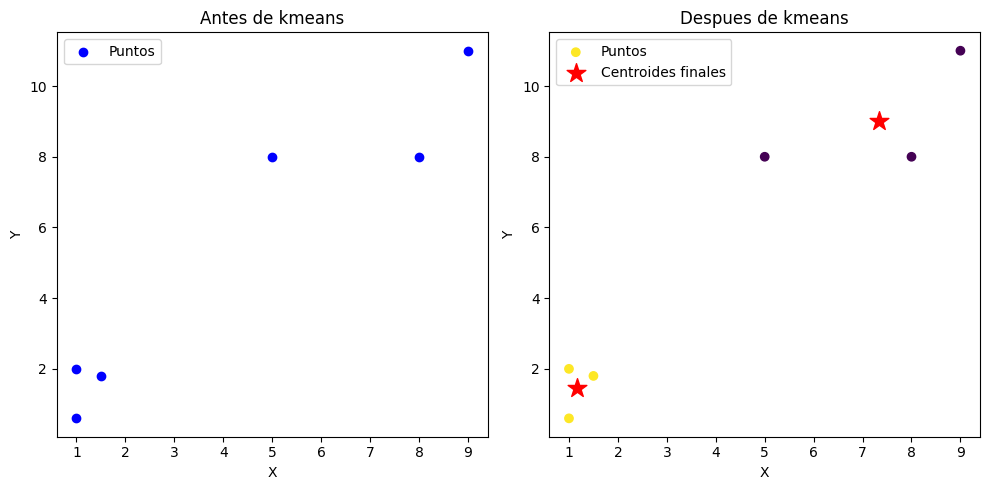

In [8]:
dibujar2D(points, kmeans.centroids, labels)

In [9]:
# Ejemplo de uso (datos con 2 caracteristicas) usando distancia de Manhattan
points = np.array([[1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], [9, 11]])
kmeans = KMeans(k=2)
labels = kmeans.run(points, tipo_distance="mahalanobis")
print(labels)
print(kmeans.centroids)

[0 0 0 1 0 1]
[[2.125 3.1  ]
 [8.5   9.5  ]]


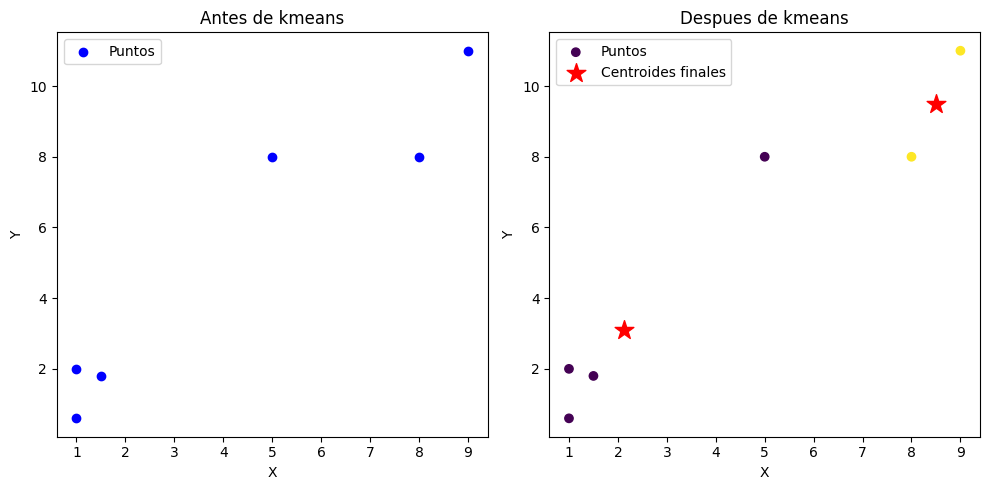

In [10]:
dibujar2D(points, kmeans.centroids, labels)

In [11]:
# Ejemplo de uso (datos con 3 caracteristicas)
points = np.array([[1, 2, 0], [1.5, 1.8, 6], [-1, 5, 8], [3.2, 8, 8], [3, 1, 0.6], [-8, 9, 11]])
kmeans = KMeans(k=3)
labels = kmeans.run(points)
print(labels)
print(kmeans.centroids)

[2 0 0 0 2 1]
[[ 1.23333333  4.93333333  7.33333333]
 [-8.          9.         11.        ]
 [ 2.          1.5         0.3       ]]


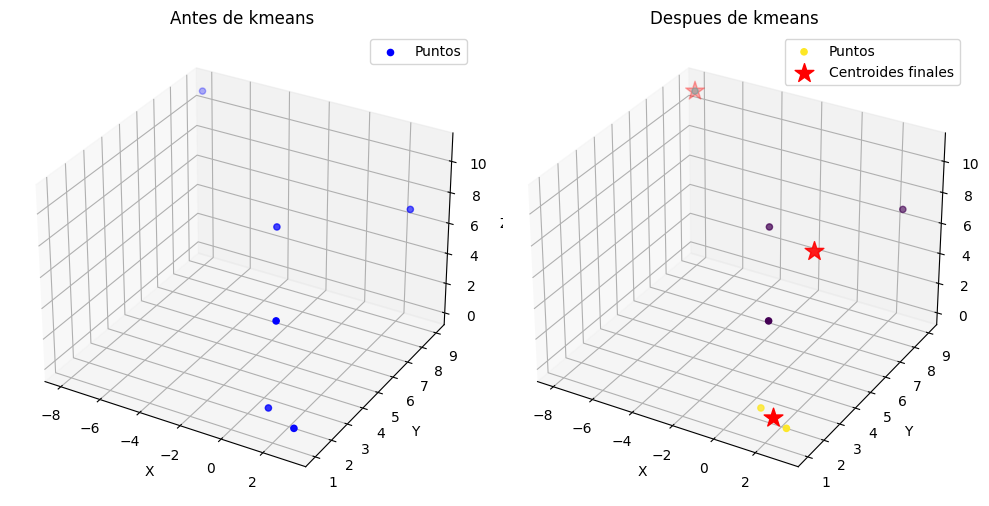

In [12]:
dibujar3D(points, kmeans.centroids, labels)

In [17]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 500,n_features = 2,centers = 4,random_state = 23)

In [18]:
kmeans = KMeans(k=3)
labels = kmeans.run(points)
print(labels)
print(kmeans.centroids)

[1 0 0 1 0 1 2 0 2 2 2 2 0 0 0 0 1 2 2 0 2 0 2 0 0 0 2 0 2 1 2 2 2 2 1 0 0
 0 2 0 2 2 0 0 2 0 0 2 0 0 0 1 1 0 1 0 0 0 0 1 2 0 0 2 1 0 0 0 0 0 2 0 0 0
 2 1 1 0 0 2 0 2 0 2 0 1 0 0 1 2 0 1 2 2 0 2 1 0 0 0 0 2 0 0 0 1 1 0 1 0 0
 2 0 0 0 2 2 1 2 0 1 0 0 1 0 0 2 0 0 1 1 2 0 0 0 1 1 1 1 0 2 0 1 1 0 2 0 0
 0 0 0 2 0 0 2 1 2 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 2 0 0 0 2 0 1 0 1 1
 0 2 1 1 2 2 1 2 0 2 1 0 0 1 0 2 0 0 0 2 0 0 1 0 0 2 0 0 0 1 2 0 0 2 0 1 0
 1 0 2 1 0 1 2 1 0 0 0 0 0 2 0 1 0 0 0 0 2 0 0 2 2 1 0 0 0 0 1 0 1 0 1 0 2
 2 2 0 0 1 0 1 0 1 2 2 0 0 2 1 2 1 1 0 1 2 0 1 0 2 2 1 1 0 0 1 0 0 2 2 0 2
 0 1 2 0 1 0 0 2 1 0 2 0 1 0 2 1 0 0 0 1 1 0 1 2 0 0 0 0 0 2 1 0 1 0 0 0 0
 2 1 2 2 0 2 0 0 0 2 0 0 1 1 1 0 0 0 1 1 2 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 1
 2 0 1 0 2 2 0 1 1 0 2 2 0 1 0 2 2 0 0 0 0 2 2 2 0 0 2 1 0 1 0 0 0 1 2 0 1
 0 0 0 2 2 0 0 1 2 2 2 0 0 2 1 2 1 0 2 1 0 0 1 0 2 0 1 2 2 0 0 2 1 1 0 1 0
 2 2 0 1 1 2 0 2 2 0 2 0 1 1 1 0 1 0 0 0 2 2 1 0 0 0 2 2 1 2 1 2 0 0 2 0 0
 0 0 1 1 2 0 1 0 0 0 2 1 

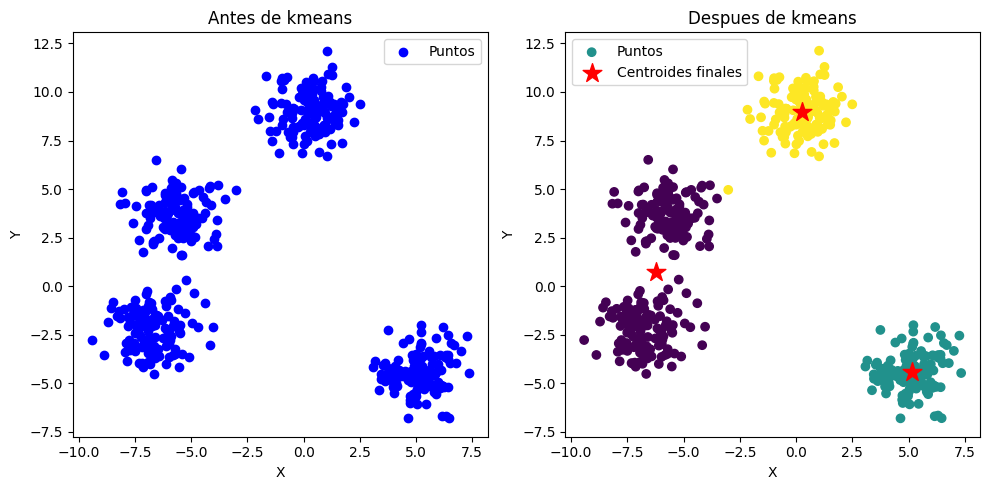

In [19]:
dibujar2D(points, kmeans.centroids, labels)